# Project 9 - Partial Correlations & Directed Acyclic Graphs

## Generating Artificial Data

In [1]:
import random
import numpy as np
import pandas as pd

In [2]:
pip install decorator==4.3

Note: you may need to restart the kernel to use updated packages.


In [3]:
length = 100000
cols = ["P", "Q", "X", "Y", "Z"]
mu = 0
sigma = 5


lst_dct = {col:[] for col in cols}
for i in range(length):
    lst_dct["P"].append(25 + np.random.normal(mu, .5 * sigma))
    lst_dct["Q"].append(50 + np.random.normal(mu, sigma))
    lst_dct["X"].append(3 * lst_dct["Q"][-1]  + np.random.normal(mu, sigma ))
    lst_dct["Y"].append(lst_dct["Q"][-1] * -1 +  np.random.normal(mu, sigma))
    lst_dct["Z"].append(
        lst_dct["P"][-1] * 2 +  1.5 * lst_dct["X"][-1] -  lst_dct["Y"][-1] * 2 +  np.random.normal(mu,  sigma))

lst_dct

{'P': [20.287717014447257,
  24.509557221843938,
  22.515440808103012,
  24.20439080921716,
  26.042837122778245,
  19.24695477587197,
  22.722746450515245,
  24.229628231004554,
  26.00900903144715,
  24.359927291141585,
  20.383208241683192,
  23.46813711197783,
  26.98500000107533,
  30.207418897528555,
  26.570374307962542,
  26.07750877247291,
  25.770401553224016,
  26.39554252335974,
  22.930054135837693,
  23.69971157594095,
  26.307618548474643,
  23.54241139740488,
  27.461249148982514,
  26.766724276169025,
  23.73219438019797,
  24.753480852103706,
  27.18713807466042,
  27.092009414774495,
  28.98545404614111,
  24.0601557329909,
  22.978985364679584,
  23.35377752415071,
  28.346345420400937,
  23.66478445742305,
  26.14548815840106,
  25.54406399692292,
  25.94161138166933,
  30.38429467914124,
  24.465260172833098,
  28.555563913284306,
  23.967759993011807,
  25.004601566731015,
  25.94495949674135,
  27.49238831764881,
  28.86935168473319,
  24.991616963311568,
  23.0

In [4]:
df = pd.DataFrame(lst_dct)
df

,P,Q,X,Y,Z
0,20.287717,56.692029,167.809557,-51.503502,395.675263
1,24.509557,53.829106,162.030298,-56.177049,398.665412
2,22.515441,47.932355,150.746751,-49.571375,363.760703
3,24.204391,47.591497,139.639857,-42.718625,335.501813
4,26.042837,55.601693,169.351771,-58.323846,416.920125
...,...,...,...,...,...
99995,24.515350,56.199096,176.382209,-55.486413,425.808509
99996,21.860309,56.258215,166.718928,-48.673304,397.559409
99997,26.524376,47.446739,141.998324,-51.861041,372.067728
99998,26.492280,40.916106,117.971809,-37.306927,306.148673


<AxesSubplot:xlabel='X', ylabel='Z'>

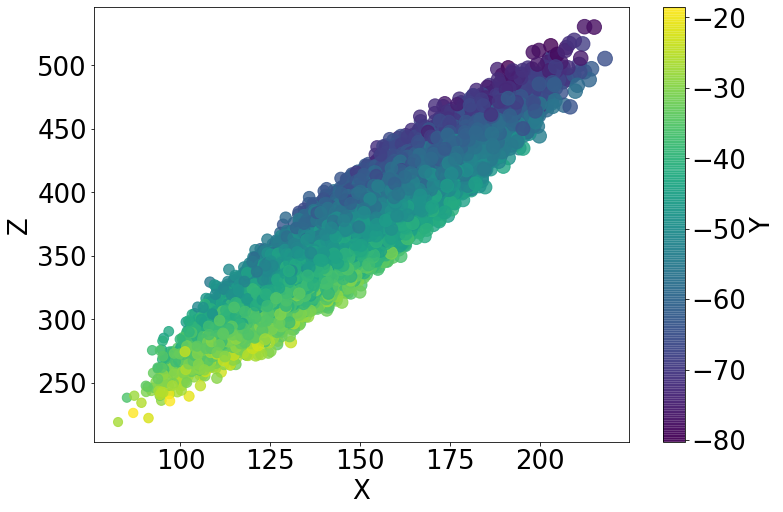

In [5]:
import matplotlib.pyplot as plt
#4D Visualization
#2D in x-y space, 3rd D: size and 4th D: color
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
df.plot.scatter(x = "X", y = "Z", c = "Y",s = "X", cmap = "viridis",alpha = .8, ax = ax)

In [6]:
df.corr()

,P,Q,X,Y,Z
P,1.000000,0.001584,0.001322,0.002412,0.140541
Q,0.001584,1.000000,0.948424,-0.705170,0.914427
X,0.001322,0.948424,1.000000,-0.668880,0.934216
Y,0.002412,-0.705170,-0.668880,1.000000,-0.844964
Z,0.140541,0.914427,0.934216,-0.844964,1.000000


In [7]:
import statsmodels.api as sm

residuals = {}
for y_var in df.keys():
    X_vars = list(df.keys())
    X_vars.remove(y_var)
    X = df [X_vars]
    X["Constant"] = 1
    y = df[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)
residuals

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 2.495e+04
Date:                Sun, 07 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:57:42   Log-Likelihood:            -1.9890e+05
No. Observations:              100000   AIC:                         3.978e+05
Df Residuals:                   99995   BIC:                         3.979e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q              0.0002      0.004      0.055      0.9

,P,Q,X,Y,Z
0,-2.460157,1.703148,-0.865058,1.180827,0.365657
1,1.198859,-0.008511,2.839477,-2.776846,-5.772196
2,0.393598,-2.224754,5.160275,-2.933142,-6.533724
3,1.550161,1.083865,2.652635,-2.157534,-7.815676
4,1.985292,-0.430229,3.491993,-2.885330,-5.848044
...,...,...,...,...,...
99995,-0.559037,-1.496485,1.816986,0.640279,1.253295
99996,-3.188702,1.816804,-3.598908,4.073428,6.414625
99997,0.200500,-0.542903,-1.156700,0.030418,2.271463
99998,0.351234,0.800763,-2.198512,1.346442,1.572443


In [8]:
residuals.corr()[residuals.corr().abs() < 1].mul(-1).fillna(1).round(2)

,P,Q,X,Y,Z
P,1.00,0.00,-0.59,0.63,0.71
Q,0.00,1.00,0.50,-0.13,0.00
X,-0.59,0.50,1.00,0.74,0.83
Y,0.63,-0.13,0.74,1.00,-0.90
Z,0.71,0.00,0.83,-0.90,1.00


In [9]:
import pingouin
df.pcorr().round(2)

,P,Q,X,Y,Z
P,1.00,0.00,-0.59,0.63,0.71
Q,0.00,1.00,0.50,-0.13,0.00
X,-0.59,0.50,1.00,0.74,0.83
Y,0.63,-0.13,0.74,1.00,-0.90
Z,0.71,0.00,0.83,-0.90,1.00


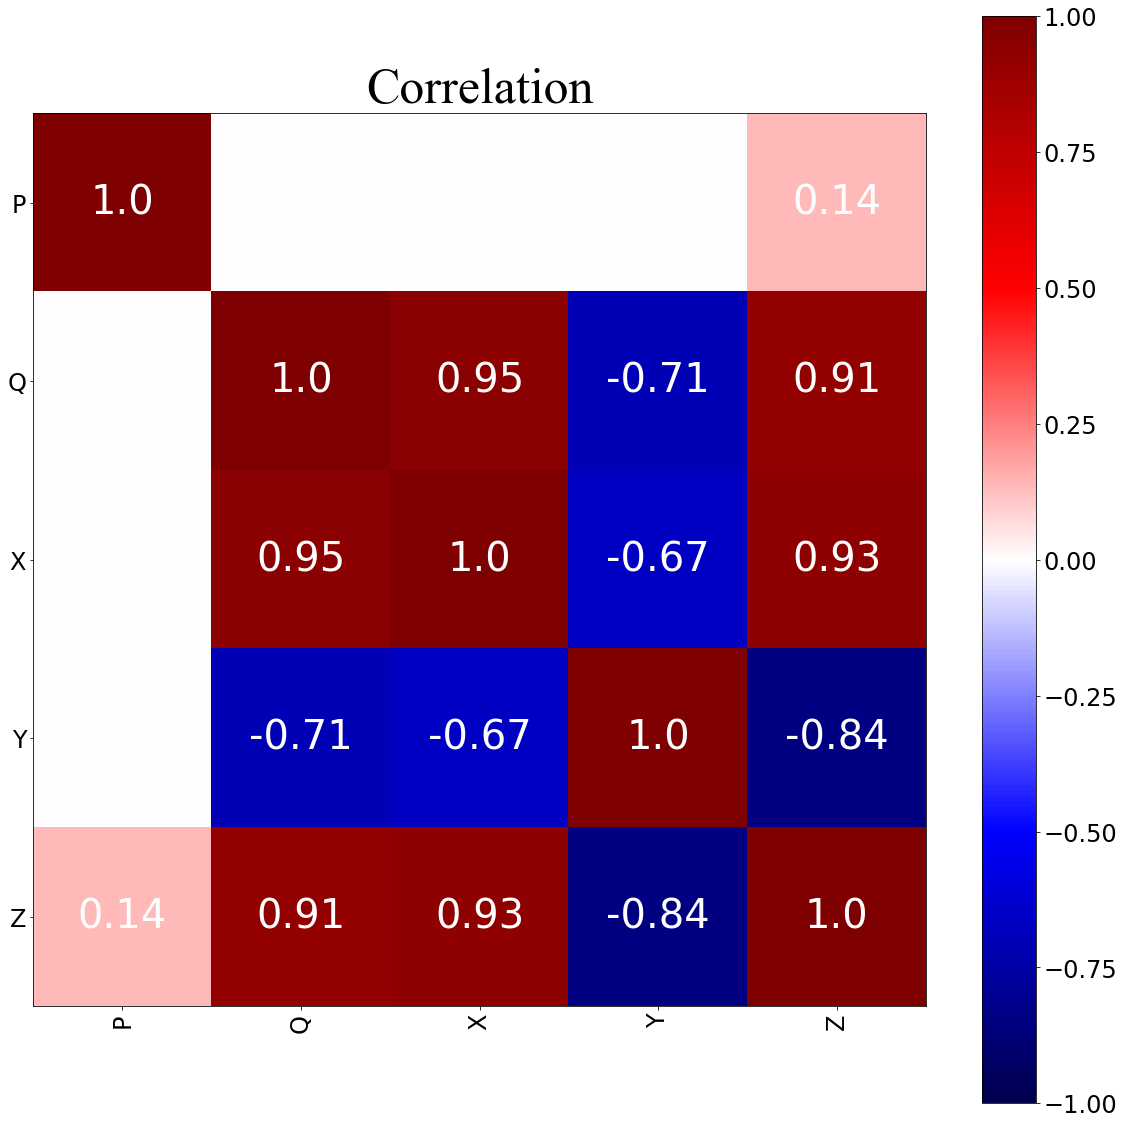

In [10]:
from datlib.plots import *
corr_matrix_heatmap(df.corr(),
                   save_fig = False,
                   pp = None,
                   title = "Correlation")

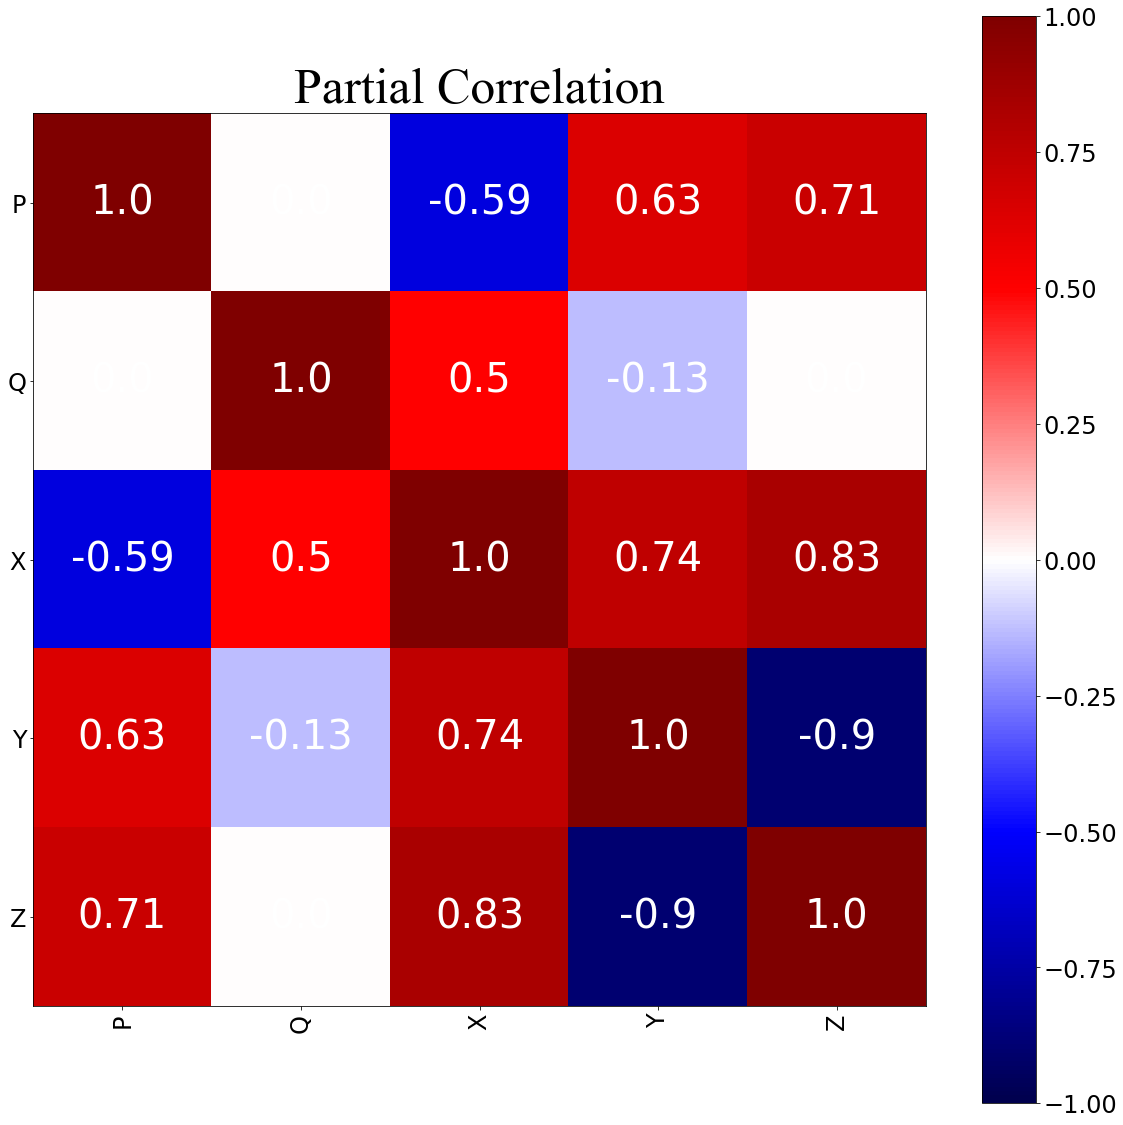

In [11]:
corr_matrix_heatmap(df.pcorr(),
                   save_fig = False,
                   pp = None,
                   title = "Partial Correlation")

In [12]:
pcorr_pvalues = {}

for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            # regress one residual on the other
            #  save the pvalue for the explanatory variable
            #  this is the pvalue of the partial correlation
            results = sm.OLS(Y, X).fit()
            pcorr_pvalues[y][x] = results.pvalues[x]
            print(results.summary())
        else:
            pcorr_pvalues[y][x] = np.NaN
            
pd.DataFrame(pcorr_pvalues).round(2)

                                 OLS Regression Results                                
Dep. Variable:                      P   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                           0.002971
Date:                Sun, 07 Nov 2021   Prob (F-statistic):                       0.957
Time:                        19:57:45   Log-Likelihood:                     -1.9890e+05
No. Observations:              100000   AIC:                                  3.978e+05
Df Residuals:                   99999   BIC:                                  3.978e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

,P,Q,X,Y,Z
P,NaN,0.96,0.0,0.0,0.00
Q,0.96,NaN,0.0,0.0,0.48
X,0.00,0.00,NaN,0.0,0.00
Y,0.00,0.00,0.0,NaN,0.00
Z,0.00,0.48,0.0,0.0,NaN


In [13]:
undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    undirected_graph[x] = [y for y in df.keys() if y != x]
undirected_graph

{'P': ['Q', 'X', 'Y', 'Z'],
 'Q': ['P', 'X', 'Y', 'Z'],
 'X': ['P', 'Q', 'Y', 'Z'],
 'Y': ['P', 'Q', 'X', 'Z'],
 'Z': ['P', 'Q', 'X', 'Y']}

In [14]:
import copy

In [15]:
p_val = .01
def build_skeleton(df, undirected_graph):
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        for c_var in control_vars:
            # set c_used every time use cycle through a new control
            #  the program will then iterate through remaining controls
            #  until statistical significance is broken
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:
                c_used.append(c_var)
                print(x,y, controls_used)
                test = df.partial_corr(x = x, y = y, covar=c_used,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val: 

                    undirected_graph[x].remove(y)
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)

                    # recursive function that iterates through remaining variables 
                    #  uses them as controls statistical significance holds without them,
                    #  otherwise break
                    check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)

    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            if x != y:
                test = df.partial_corr(x=x, 
                                       y=y, 
                                       covar = None,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                else:
                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

build_skeleton(df, undirected_graph)

P Z []
P Z ['Q']
P Z ['Q', 'X']
P Z ['Q']
P Z ['Q', 'Y']
P Z []
P Z ['X']
P Z ['X', 'Q']
P Z ['X']
P Z ['X', 'Y']
P Z []
P Z ['Y']
P Z ['Y', 'Q']
P Z ['Y']
P Z ['Y', 'X']
Q X []
Q X ['P']
Q X ['P', 'Y']
Q X ['P']
Q X ['P', 'Z']
Q X []
Q X ['Y']
Q X ['Y', 'P']
Q X ['Y']
Q X ['Y', 'Z']
Q X []
Q X ['Z']
Q X ['Z', 'P']
Q X ['Z']
Q X ['Z', 'Y']
Q Y []
Q Y ['P']
Q Y ['P', 'X']
Q Y ['P']
Q Y ['P', 'Z']
Q Y []
Q Y ['X']
Q Y ['X', 'P']
Q Y ['X']
Q Y ['X', 'Z']
Q Y []
Q Y ['Z']
Q Y ['Z', 'P']
Q Y ['Z']
Q Y ['Z', 'X']
Q Z []
Q Z ['P']
Q Z ['P', 'X']
X Q []
X Q ['P']
X Q ['P', 'Y']
X Q ['P']
X Q ['P', 'Z']
X Q []
X Q ['Y']
X Q ['Y', 'P']
X Q ['Y']
X Q ['Y', 'Z']
X Q []
X Q ['Z']
X Q ['Z', 'P']
X Q ['Z']
X Q ['Z', 'Y']
X Y []
X Y ['P']
X Z []
X Z ['P']
X Z ['P', 'Q']
X Z ['P']
X Z ['P', 'Y']
X Z []
X Z ['Q']
X Z ['Q', 'P']
X Z ['Q']
X Z ['Q', 'Y']
X Z []
X Z ['Y']
X Z ['Y', 'P']
X Z ['Y']
X Z ['Y', 'Q']
Y Q []
Y Q ['P']
Y Q ['P', 'X']
Y Q ['P']
Y Q ['P', 'Z']
Y Q []
Y Q ['X']
Y Q ['X', 'P']
Y Q ['X

{'P': ['Z'],
 'Q': ['X', 'Y'],
 'X': ['Q', 'Z'],
 'Y': ['Q', 'Z'],
 'Z': ['P', 'X', 'Y']}

In [16]:
pip install pgmpy

Note: you may need to restart the kernel to use updated packages.


In [17]:
import pgmpy

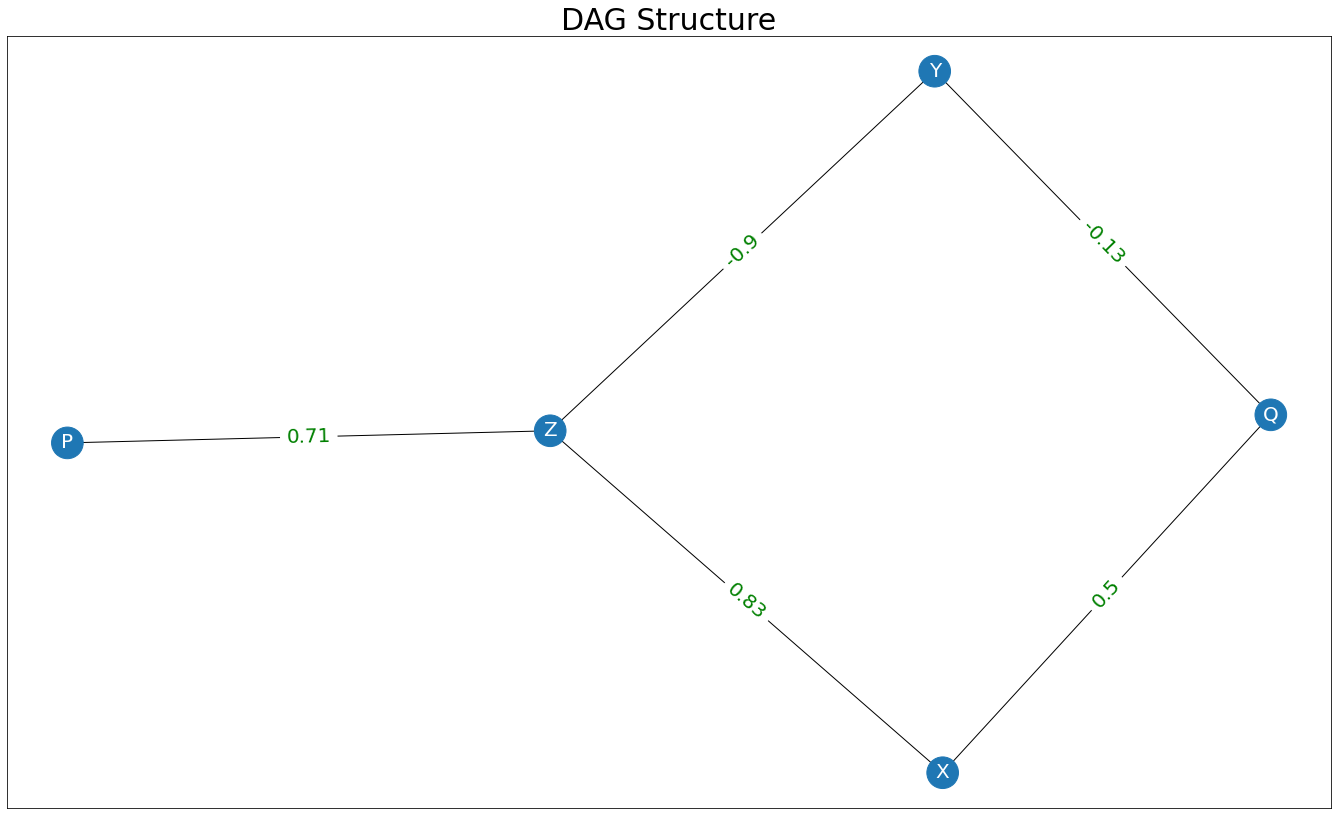

In [22]:
import matplotlib.pyplot as plt
import networkx as nx

def graph_DAG(undirected_graph, df, title = "DAG Structure"):
    pcorr_matrix = df.pcorr()
    graph= nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key, key2)
                edges.append(edge)
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2], 2))
    
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, 
                     pos, 
                     node_color = color_map,
                     node_size=1000,
                    #show node label
                     with_labels = True,
                     arrows = False,
                     font_size = 20,
                     alpha = 1,
                     font_color = "white",
                     ax = ax)
    nx.draw_networkx_edge_labels(graph,
                                 pos,
                                edge_labels = edge_labels,
                                 font_color = "green",
                                 font_size=20)    
    
    plt.show()
    
graph_DAG(undirected_graph, df)

In [19]:
from pgmpy.estimators import PC
c= PC(df)
max_cond_vars = len(df.keys()) - 2
model = c.estimate(return_type = "dag",
                  variant = "parallel", #"orig", "stable"
                  significance = p_val,
                  max_cond_vars = max_cond_vars,
                  ci_test = "pearsonr")
edges = model.edges()
edges

  0%|          | 0/3 [00:00<?, ?it/s]

OutEdgeView([('P', 'Z'), ('X', 'Z'), ('Y', 'Z'), ('Q', 'Y'), ('Q', 'X')])

keep control: X
keep control: Y
('P', 'Z') ['X', 'Y']
keep control: P
keep control: Y
('X', 'Z') ['P', 'Y']
keep control: P
keep control: X
('Y', 'Z') ['P', 'X']
('Q', 'Y') []
('Q', 'X') []


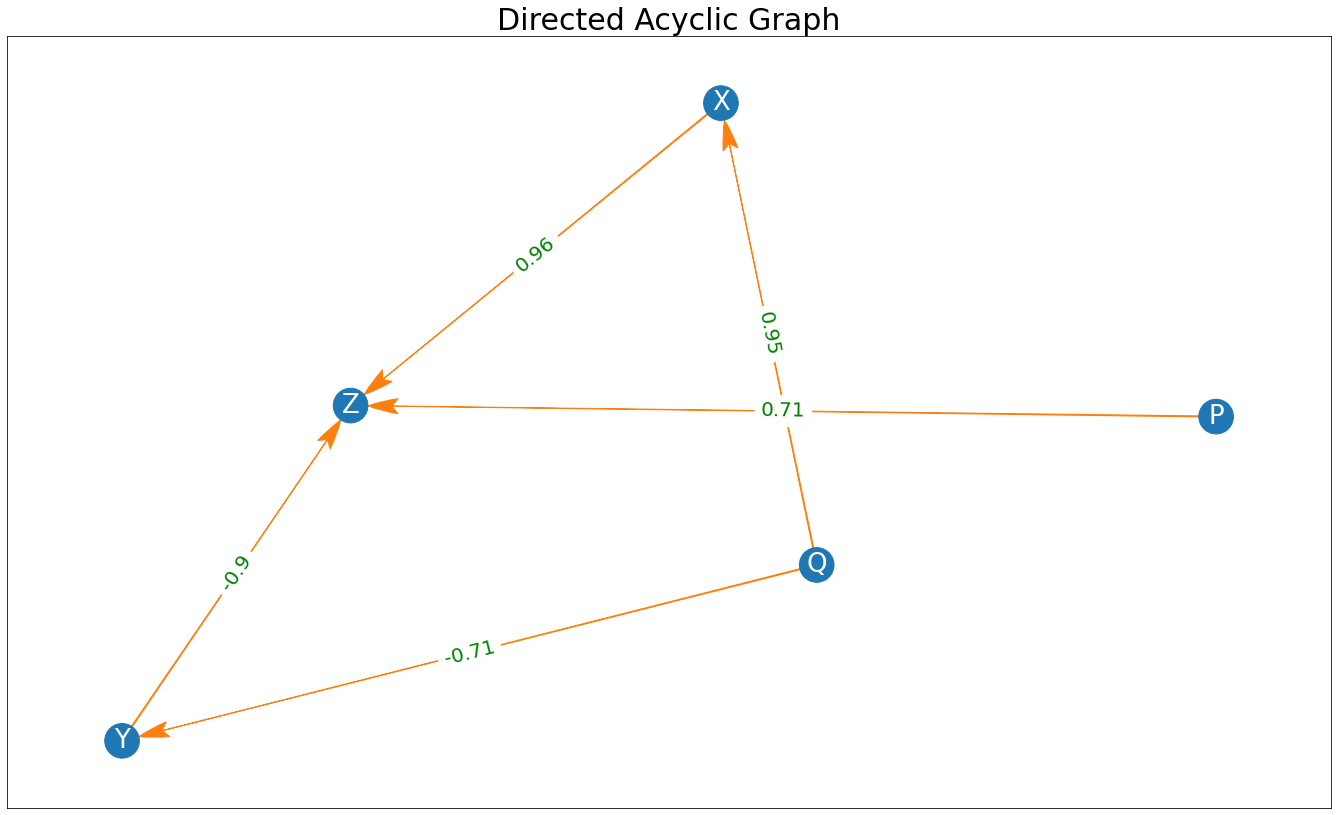

In [21]:
from matplotlib.patches import ArrowStyle

def graph_DAG(edges, df, title=""):
    graph = nx.DiGraph()
    
    edge_labels = {}
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        control = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0]]
            if (control, edge[1]) in control_edges:
                print("keep control:", control)
                keep_controls.append(control)
        print(edge, keep_controls)
        # build pcorr matrix with nodes from the edge + controls
        pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr().round(2)
        edge_labels[edge] = str(pcorr.loc[edge[1], edge[0]])
    
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph,
                    pos,
                    node_color = color_map,
                    node_size = 1200,
                    font_color = "white",
                    font_size = 26,
                    alpha = 1,
                    width = 1,
                    edge_color = "C1",
                    arrowstyle = ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width = .1"))
    
    nx.draw_networkx_edge_labels(graph,
                                pos,
                                edge_labels = edge_labels,
                                font_color = "green",
                                font_size = 20)
    
    plt.show()
graph_DAG(edges, df, title = "Directed Acyclic Graph")